# **Data Overview: Breast Cancer prediction**
---

**Then notebook provides a basic overview to the UCI Breast Cancer Dataset. Simple EDA and visualizations are demonstrated for basic understanding of the raw data.**

**Following are some basic visualizations of the raw data :**

- [**Distribution of Class**](##Distribution-of-Class-:-Diagnosis)
- [**Clustermap**](##Clustermap)
- [**KDE Features Distribution**](##KDE-Features-Distribution)



In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

In [13]:
# reading the dataset

df = pd.read_csv(r"D:\Pragyan\Machine Learing Cancer prediction\breast-cancer-prediction\data\raw\breast-cancer-dataset.csv")
df.drop("id", axis=1, inplace=True)
print(f"shape: {df.shape}")
print(f"n_duplicates: {df.duplicated().sum()}")
print(f"null_values: {df.isnull().sum().sum()}")
df.head()

shape: (569, 31)
n_duplicates: 0
null_values: 0


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [16]:
features = df.drop("diagnosis", axis=1)
target = df['diagnosis']

## **Distribution of Class : Diagnosis**

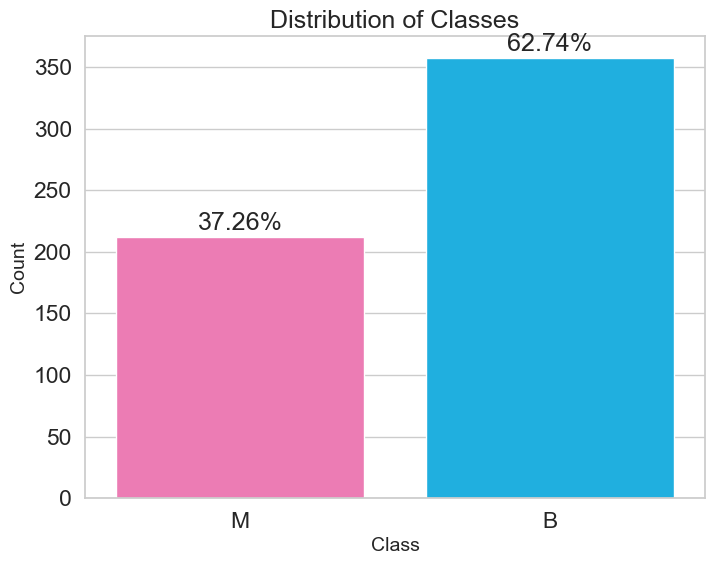

In [23]:
plt.figure(figsize=(8,6))

sns.countplot(x="diagnosis",
              data=df,
              palette=["#FF69B4", "#00BFFF"])
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()/len(df)*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Distribution of Classes", fontsize=18)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()


## **Clustermap**

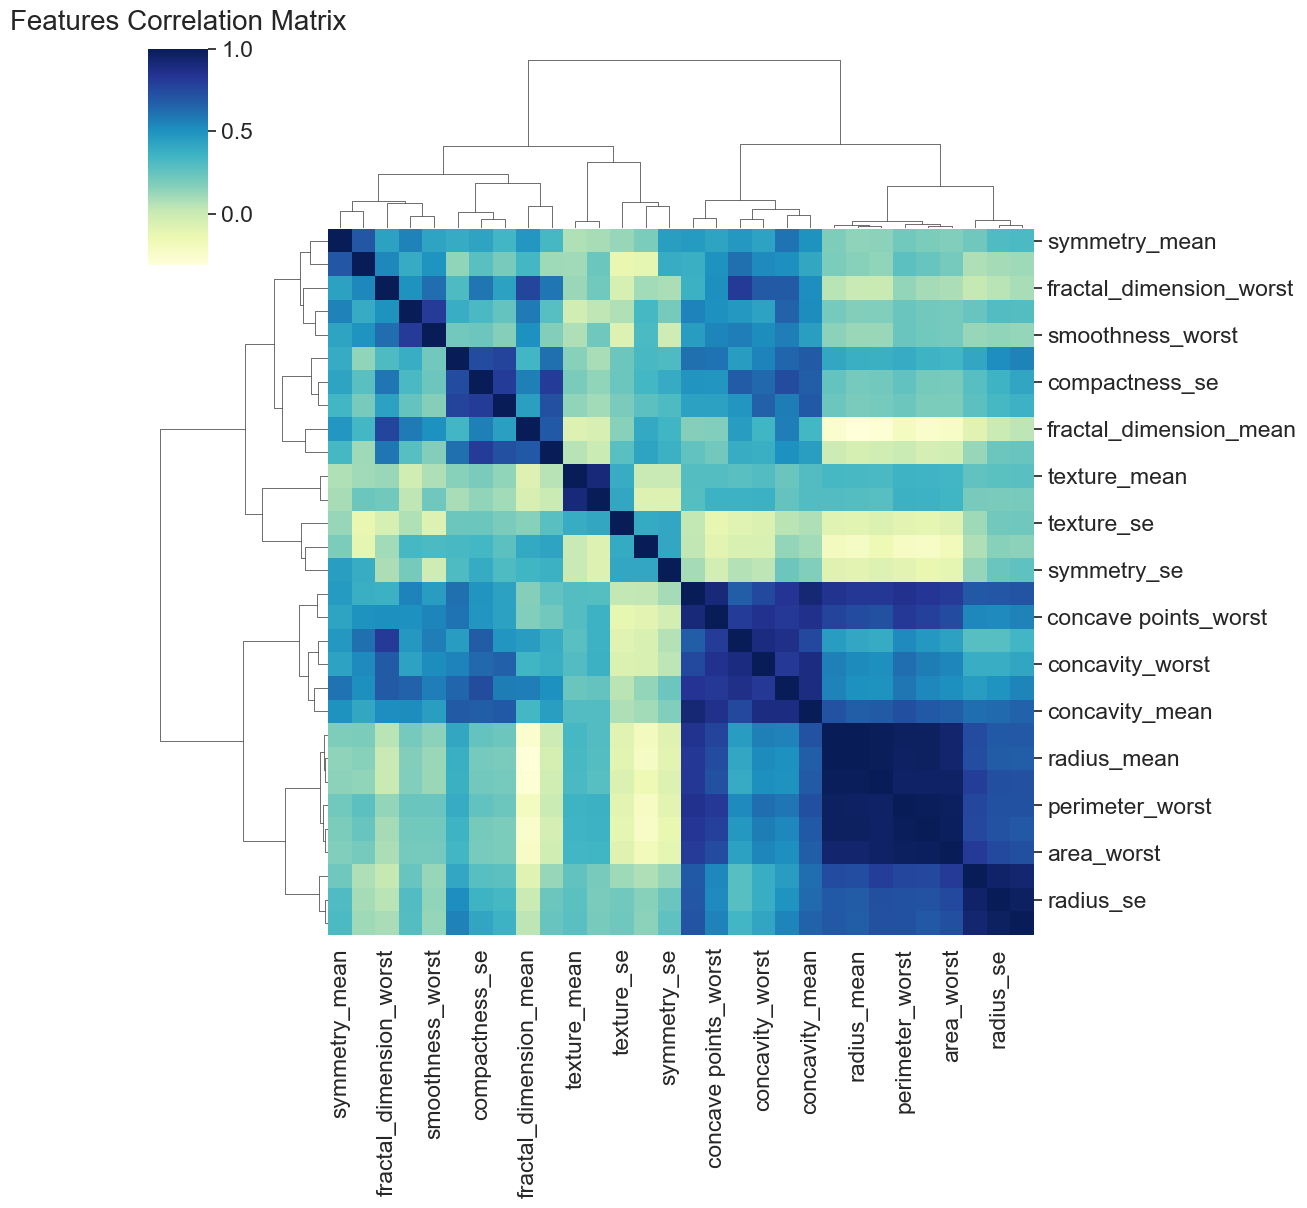

In [33]:

sns.clustermap(features.corr(), 
               cmap="YlGnBu", 
               figsize=(12,12), 
               method="ward",
               label="matrix")

plt.title("Features Correlation Matrix", y=1.05, fontsize=20, ha="center")
plt.show()


## **KDE Features Distribution**

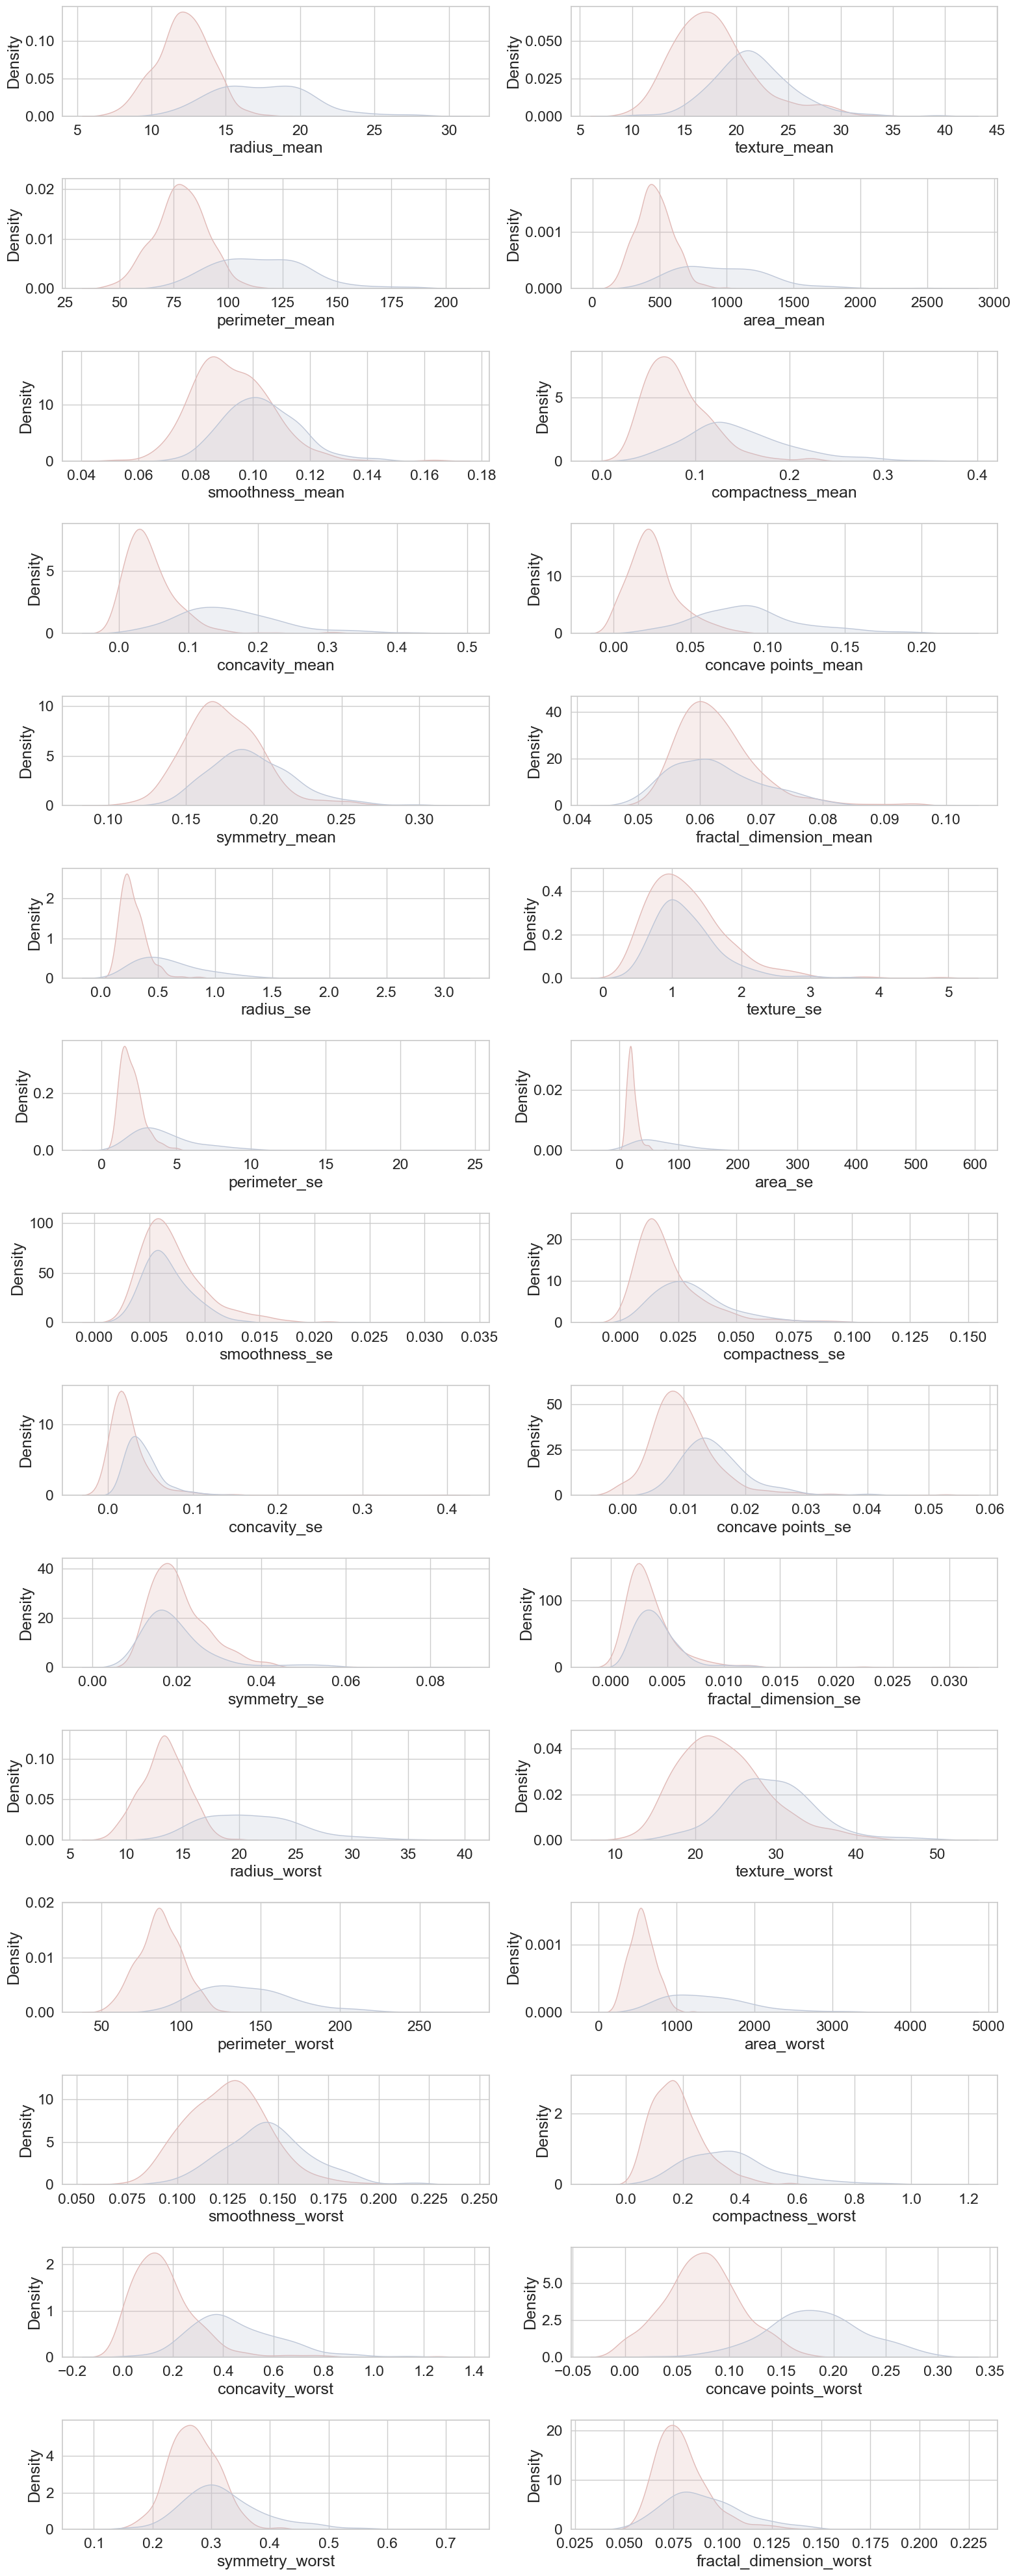

In [36]:
fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(16, 40), sharex=False)

for i, ax in enumerate(axes.flatten()):
    sns.kdeplot(data=df, x=features.columns[i], 
                hue="diagnosis", ax=ax, 
                palette="vlag", fill=True,
                legend=False)

plt.tight_layout()
plt.show()